<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/01-A-Introduction-Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Class Version In Colab"/>Class Version</a>

In [8]:
%pip install statsforecast --quiet

Note: you may need to restart the kernel to use updated packages.


## Recap

A bank account with a two percent monthly interest rate is opened with an initial deposit of 10 USD. The value of the account in month t
can be specified in two ways: 


- As a recursive formula that describes the change from month to month: 
$$
  x_t = x_{t-1} \times (1 + 0.02)
$$
with initial value \(x_0 = 10\) USD.

- As a closed formula that describes the value directly as a function of time and the initial value:
  $$
  x_t = x_0 \times (1 + 0.02)^t
  $$
  with initial value \(x_0 = 10\) USD.

In [ ]:
import pandas as pd
import numpy as np

t = np.arange(0, 61)
x_0 = 10
r = 0.02

x_t = x_0 * (1 + r) ** t

print("What is in t (first 10 values): ", t[:10])
print("What is in x_t (first 10 values): ", x_t[:10])


What is in t (first 10 values):  [0 1 2 3 4 5 6 7 8 9]
What is in x_t (first 10 values):  [10.         10.2        10.404      10.61208    10.8243216  11.04080803
 11.26162419 11.48685668 11.71659381 11.95092569]


In [ ]:
# Pack the two arrays into a pandas DataFrame

account = pd.DataFrame({'time': t, 'amount': x_t})
account.head()

We also set the index of the `account` data frame to a sequence of dates starting from the first of October 2025.

In [ ]:
time_index = pd.date_range(start='2025-10-01', periods=len(account), freq='MS')

account = account.set_index(time_index)
account.index.name = 'date'
account.head()

,time,amount
date,,
2025-10-01,0,10.000000
2025-11-01,1,10.200000
2025-12-01,2,10.404000
2026-01-01,3,10.612080
2026-02-01,4,10.824322


## Rate of Change

A central theme in this course will be the study of _change_ in time series. We will work with mainly three measures of change:

1. First difference: 

$$
\Delta x_t = x_t - x_{t-1}
$$

2. The relative change (return)

$$
r_t = \frac{x_t - x_{t-1}}{x_{t-1}}
$$

3. The logarithmic difference
$$
\log(x_t) - \log(x_{t-1}) \approx r_t
$$

In [ ]:
# 1. Calculate the first lag of amount using the shift() method
#  and store it in a new column "lag1". Why is the first value NaN and what does it mean?

# 2. Calculate returns and log-returns using the diff() and pct_change() methods
#  and store them in new columns "return" and "log_return"

# 3. Print the first few rows of the data frame using the head() method


,t,amount,lag_1,diff,return,log_return
date,,,,,,
2025-09-01,0,10.000000,NaN,NaN,NaN,NaN
2025-10-01,1,10.200000,10.00000,0.200000,0.02,0.0198
2025-11-01,2,10.404000,10.20000,0.204000,0.02,0.0198
2025-12-01,3,10.612080,10.40400,0.208080,0.02,0.0198
2026-01-01,4,10.824322,10.61208,0.212242,0.02,0.0198


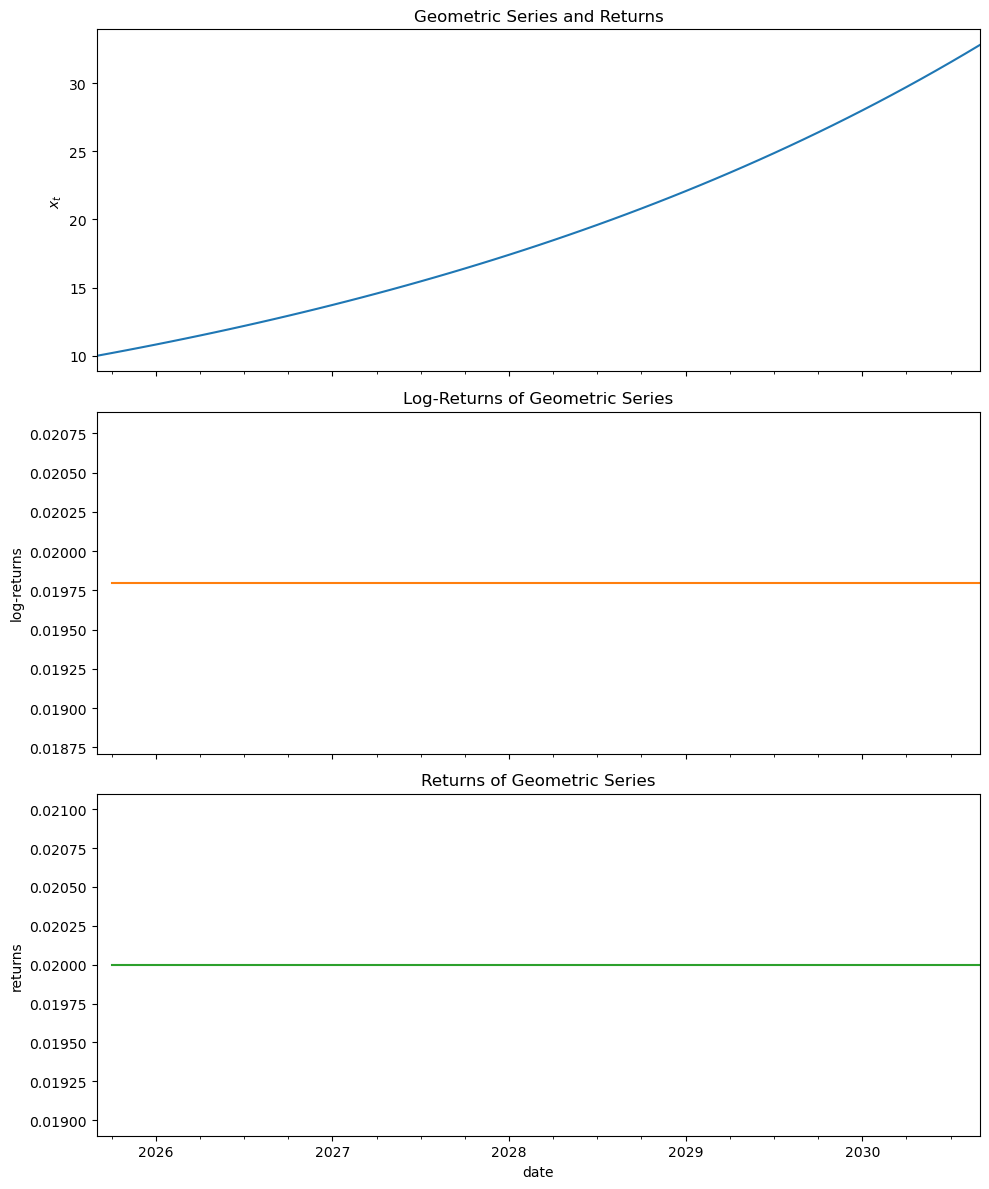

In [ ]:
# Plot the amount, log-returns, and returns series


## Noisy Time Series

$$
\begin{align}
x_t & = (1 + 0.02)x_{t - 1} + \epsilon_t,\quad x_0 = 10 \\
\epsilon_t & \sim \text{i.i.d. } U(-5, 5)
\end{align}
$$


In [3]:
# Generate an array of the same size (number of elements) as the number of rows in the account data frame
# from the uniform distribution between -5 and 5

np.random.seed(42)

noise = np.random.uniform(-5, 5, size=account.shape[0])
noise

array([-1.25459881,  4.50714306,  2.31993942,  0.98658484, -3.4398136 ,
       -3.4400548 , -4.41916388,  3.66176146,  1.01115012,  2.08072578,
       -4.79415506,  4.69909852,  3.32442641, -2.87660889, -3.18175033,
       -3.1659549 , -1.95757757,  0.24756432, -0.68054981, -2.0877086 ,
        1.11852895, -3.60506139, -2.07855351, -1.33638157, -0.43930016,
        2.85175961, -3.00326218,  0.14234438,  0.92414569, -4.53549587,
        1.07544852, -3.29475876, -4.34948407,  4.48885537,  4.65632033,
        3.08397348, -1.95386231, -4.02327886,  1.84233027, -0.59847506,
       -3.77961765, -0.0482309 , -4.65611479,  4.09320402, -2.41220018,
        1.62522284, -1.88288924,  0.20068021,  0.46710279, -3.15145544,
        4.69584628,  2.75132823,  4.39498942,  3.9482735 ,  0.97899979,
        4.21874235, -4.11507498, -3.04017138, -4.54772711, -1.74669669,
       -1.1132271 ])

<Axes: xlabel='date'>

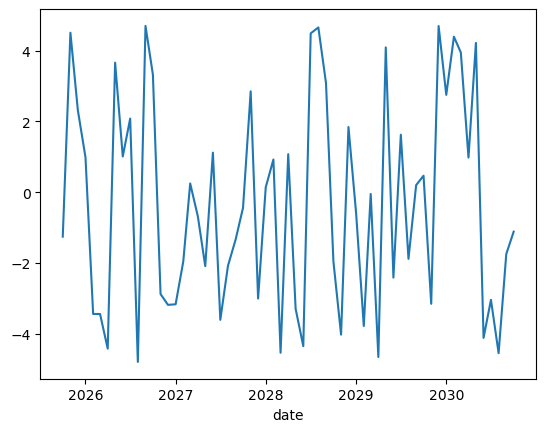

In [ ]:
# Plot the noise series using seaborn

import seaborn as sns

sns.lineplot(x=account.index, y=noise)

In [ ]:
# Uncomment the code below and run it.
# Make sure that you have already defined the account data frame above

# np.random.seed(41232)

# amount_with_noise = np.zeros(len(account))
# noise = np.random.uniform(-5, 5, size=len(account))

# for i in range(len(account)):
#     if i == 0:
#         amount_with_noise[i] = account["amount"].iloc[i] + noise[i]
#     else:
#         amount_with_noise[i] = amount_with_noise[i - 1] * 1.02 + noise[i]

# account["noise"] = noise
# account["amount_noisy"] = amount_with_noise

# account.head()

,t,amount,noise,amount_with_noise,amount_noisy
0,0,10.000000,3.632542,13.632542,13.632542
1,1,10.200000,-1.557040,12.348152,12.348152
2,2,10.404000,3.006988,15.602104,15.602104
3,3,10.612080,-2.067997,13.846149,13.846149
4,4,10.824322,1.731834,15.854905,15.854905


<Axes: >

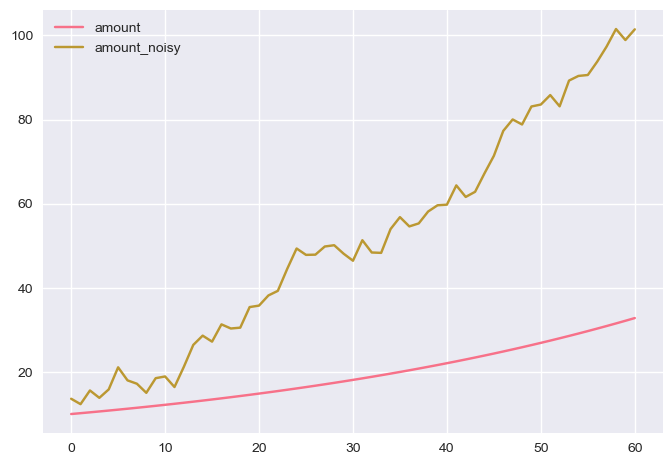

In [ ]:
# Plot the amount and the noisy amount series using the plot() method 
#  of the data frame


## Forecasting



In [ ]:
# Find the value of the noisy amount in December 2028



date
2028-12-01    21.966342
Freq: MS, Name: amount_noisy, dtype: float64

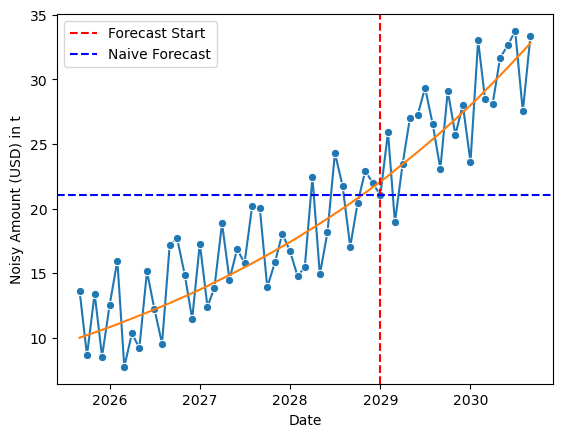

In [ ]:
# Plot the noisy series and the naive forecast after 2028-12
#  uncomment the code below and run it

# sns.lineplot(data=account, x="date", y="amount_noisy", marker="o")

# # Add the noiseless amount
# plt.plot(account.index, account["amount"], marker="")

# plt.axvline(pd.to_datetime("2029-01-01"), color="red", linestyle="--", label="Forecast Start")
# plt.axhline(y=account.loc["2029-01-01"]["amount_noisy"], color="blue", linestyle="--", label="Naive Forecast")

# plt.xlabel("Date")
# plt.ylabel(r"Noisy Amount (USD) in t")

# plt.legend()

Although the naive forecast is very simple, it is an extremely useful benchmark. 
Any forecast model that you develop should be at least as good as the naive forecast, 
otherwise it is very likely not worth using.

It is also a nice place to introduce specialized libraries that can handle both naive and more advanced forecasting methods.

A recent addition to the Python ecosystem is the `statsforecast` library which provides a unified interface to several forecasting methods
and provides convenient functionality for evaluating forecast accuracy.

In order to use it, we need to restructure our data a bit. The library expects a `pandas` DataFrame in long format
with three columns:

1. An identifier column called `unique_id` (for multiple time series)
2. A date column called `ds` 
3. A value column called `y`.

In our case we have only one time series (the `amount_noisy` column) but we still need to move the date index to a column and add an identifier column.

In [ ]:
# Uncomment the code below

# account_ds = account.reset_index()[["date", "amount_noisy"]].rename(columns={"date": "ds", "amount_noisy": "y"})
# account_ds["unique_id"] = "amount_noisy"

# account_ds.head()

,ds,y,unique_id
0,2025-09-01,13.632542,amount_noisy
1,2025-10-01,8.642960,amount_noisy
2,2025-11-01,13.410988,amount_noisy
3,2025-12-01,8.544083,amount_noisy
4,2026-01-01,12.556155,amount_noisy


In [ ]:
# statsforecast is not available in the default Colab environment
# so we need to install it first

%pip install --quiet statsforecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive

# Uncomment the code below and run it

# # Train/test split
# train_end = pd.Timestamp("2028-12-01")
# train_df = account_ds[account_ds["ds"] <= train_end]
# test_df = account_ds[account_ds["ds"] > train_end]

# h = len(test_df)
# print(f"Train rows: {len(train_df)}, Test rows: {len(test_df)} (h={h})")

# # Fit Naive and forecast h steps ahead
# sf = StatsForecast(
#     models=[Naive()], 
#     freq="MS"
# )

# sf = sf.fit(train_df)

# predicted_df = sf.predict(h=h, level=[90])
# predicted_df.tail()

Train rows: 40, Test rows: 21 (h=21)


c:\Users\Boyko Amarov\.conda\envs\ts2025\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,Naive,Naive-lo-90,Naive-hi-90
unique_id,,,,
amount_noisy,2030-05-01,21.966343,-6.490766,50.423450
amount_noisy,2030-06-01,21.966343,-7.315780,51.248466
amount_noisy,2030-07-01,21.966343,-8.118178,52.050865
amount_noisy,2030-08-01,21.966343,-8.899725,52.832413
amount_noisy,2030-09-01,21.966343,-9.661965,53.594650


c:\Users\Boyko Amarov\.conda\envs\ts2025\Lib\site-packages\statsforecast\core.py:1447: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


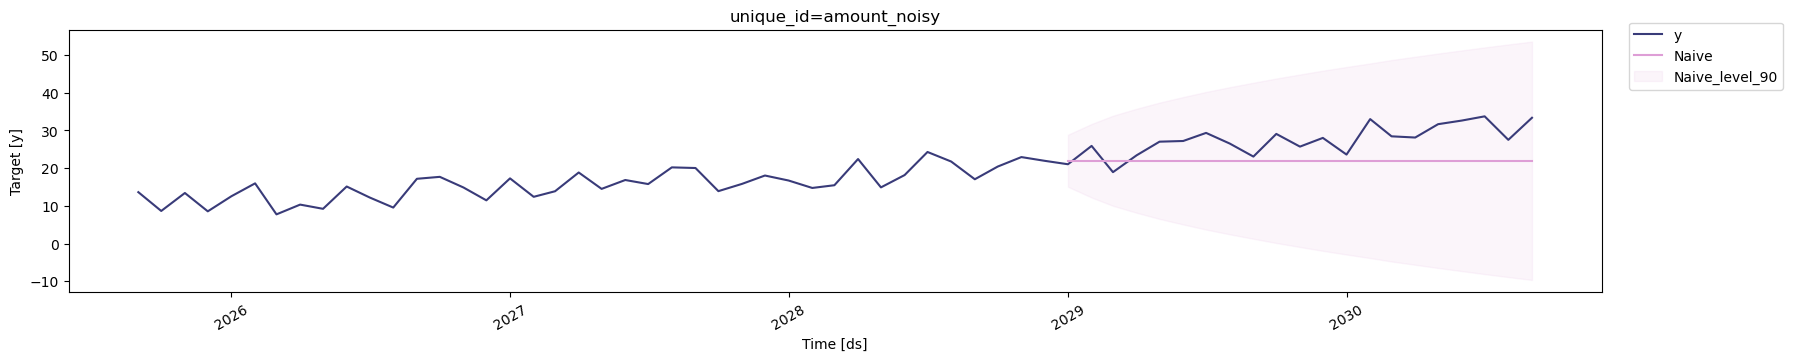

In [ ]:
# sf.plot(account_ds, predicted_df, level=[90])

## Forecasting Error


$$
\text{SSE} = \sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2
$$


$$
\text{MSE} = \frac{1}{T} \sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2
$$


$$
\text{RMSE} = \sqrt{\frac{1}{T} \sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2}
$$

$$
R^2 = 1 - \frac{\sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2}{\sum_{t}^{T} (x_{t} - \bar{x})^2}
$$

Where $\bar{x}$ is the arithmetic average of the values $x_1, x_2, \ldots, x_T$:

$$
\bar{x} = \frac{1}{T} \sum_{t = 1}^{T} x_t
$$


In [ ]:
# Exercise: given a set of test values in y and predicted values in yhat,
# compute the SSE, MSE, RMSE and R^2
# using the functions np.sqrt, np.sum, np.mean

y = np.array([2.5, 8, 14, 3])
yhat = np.array([3.5, 4, 12, 3])


In [ ]:
# Exercise: use the values in amount_noisy from the test dataset
# and compute the SSE, MSE, RMSE and R^2 for the naive forecast (21.966343)



## Exercise

The dataset electr contains the Bulgarian internal electricity consumption in GHw.

1. Plot the consumption series
2. Summarize the dataset and report the following:
   - The date of the first and the last observation.
   - The reporting frequency
   - The minimum, maximum, average and median of the consumption in GWh.
3. Split the data into a training and testing set (the last 12 months)
4. Use statsforecast to predict the last 12 months using the benchmark
 models: `Naive`, `HistoricAverage` and `SeasonalNaive`.
1. Explain how each of these models calculates its prediction.
2. Compute the RMSE for each model on the test set and choose the best model

Create a new series that contains the total annual consumption. Use the 
data after the beginning of 2010 to predict the total consumption 
in the last two years. Again, compare the three benchmark models on the
test data.

In [ ]:
# Example

electr = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/electricity/bg_internal_consumption.csv")
electr["month"] = pd.to_datetime(electr["month"])
electr["GWh"] = pd.to_numeric(electr["electr"], errors="coerce")
electr = electr.drop(columns="electr")
electr = electr.dropna()

electr = electr.set_index("month")

electr.head()

,GWh
month,
2008-01-01,3808.0
2008-02-01,3281.0
2008-03-01,2923.0
2008-04-01,2593.0
2008-05-01,2449.0
